In [2]:
import os
import requests
import pandas as pd

API_KEY = os.getenv("TMDB_API_KEY", "466d1ca1a5f0adf270a1169cf1919262")
NOW_LANG = "ko-KO"
PAGE = 1
GEN_LANG = "ko"
POSTER_BASE = "https://image.tmdb.org/t/p/w500"
BACKDROP_BASE = "https://image.tmdb.org/t/p/w780"

#genre 장르 데이터 적용하기  # 액션 |스릴러 |범죄
def genre_ids_to_names(ids,genre_map: dict) -> str : 
    if not isinstance(ids,list) : 
        return ""
    names = [genre_map.get(i, str(i)) for i in ids]
    return " | ".join(names) 

# 텍스트 개행 수정 함수
def clean_one_line(text: str) -> str :
    if not text :
        return ""
    text = text.replace("\n", " ")
    return " ".join(text.split())
    # return text
    

# genres(장르) 데이터 가져오기
def fetch_genre_map(api_key: str, language: str = "ko") -> dict : # : str / -> dict  타입표기법. 구문이 길어지면 타입을 표기해줌 
    url = "https://api.themoviedb.org/3/genre/movie/list"
    params = {"api_key": api_key, "language" : language}
    res = requests.get(url, params=params, timeout=20)
    res.raise_for_status()

    genres = res.json().get("genres", [])
    return {g["id"] : g["name"] for g in genres}

# gerne 값 찾아오기
genre_map = fetch_genre_map(API_KEY, GEN_LANG)

# now playing 데이터 가져오기 
url = "https://api.themoviedb.org/3/movie/now_playing"
params = {"api_key": API_KEY, "language": NOW_LANG, "page": PAGE } 

res = requests.get(url, params=params, timeout=20)

res.raise_for_status()

data = res.json()

rows = []

for m in data.get("results", []) : 
    poster_path = m.get("poster_path")
    backdrop_path = m.get("backdrop_path")

    poster_url = f"{POSTER_BASE}{poster_path}" if poster_path else ""
    backdrop_url = f"{BACKDROP_BASE}{backdrop_path}" if backdrop_path else ""

    genre_ids = m.get("genre_ids", [])
   
    rows.append({
        "id": m.get("id"),
        "title": m.get("title"),
        "original_title": m.get("original_title"),
        "adult": m.get("adult"),
        "overview": clean_one_line(m.get("overview")),
        "genre_ids": ".".join(map(str, genre_ids)) if isinstance(genre_ids, list) else "", 
        "genre_names" : genre_ids_to_names(genre_ids, genre_map),
        "original_language" : m.get("original_language"),
        "vote_average" : m.get("vote_average"),
        "popularity" : m.get("popularity"),
        "vote_count" : m.get("vote_count"),
        "poster_url" : poster_url,
        "backdrop_url" : backdrop_url
    })

# "id", "title", "original_title", " adult", "overview" -> field명 그룹 => colums 
df = pd.DataFrame(rows, columns=[
    "id",
    "title", 
    "original_title", 
    "genre_ids", 
    "genre_names",
    "adult", 
    "overview",
    "original_language"
    "vote_average",
    "vote_count",
    "popularity",
    "poster_url",
    "backdrop_url"
    
])


out_path = "tmdb_now_playing_v4.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✔ 저장완료: {out_path} (rows={len(df)})")

df.head()

✔ 저장완료: tmdb_now_playing_v4.csv (rows=20)


,id,title,original_title,genre_ids,genre_names,adult,overview,original_language,vote_average,vote_count,popularity,poster_url,backdrop_url
0,1306368,더 립,The Rip,28.53.80,액션 | 스릴러 | 범죄,False,허름한 은닉처에서 수백만 달러의 현금을 발견한 마이애미 경찰. 신뢰에 금이 가기 시...,en,7.033,842,346.4826,https://image.tmdb.org/t/p/w500/o0d6Us9VWOW0nH...,https://image.tmdb.org/t/p/w780/3F2EXWF1thX0Bd...
1,1043197,더스트 바니,Dust Bunny,28.14.53,액션 | 판타지 | 스릴러,False,“어른도 아이도 함께하는 몬스터 사냥 이야기” 열 살 소녀 오로라는 침대 밑에 숨어...,en,6.564,128,288.1896,https://image.tmdb.org/t/p/w500/vobigFZFvbYPf6...,https://image.tmdb.org/t/p/w780/AecGG1XVCmkk7f...
2,83533,아바타: 불과 재,Avatar: Fire and Ash,878.12.14,SF | 모험 | 판타지,False,"인간들과의 전쟁으로 첫째 아들 ‘네테이얌’을 잃은 후, ‘제이크’와 ‘네이티리’는 ...",en,7.308,1631,241.8643,https://image.tmdb.org/t/p/w500/l18o0AK18KS118...,https://image.tmdb.org/t/p/w780/3Dqievkc7krcTt...
3,991494,스폰지밥 무비: 네모바지를 찾아서,The SpongeBob Movie: Search for SquarePants,16.10751.35.12.14,애니메이션 | 가족 | 코미디 | 모험 | 판타지,False,비키니시티에 사는 스폰지밥은 무시무시한 롤러코스터를 탈 수 있는 용감한 ‘빅 가이’...,en,6.526,136,183.5545,https://image.tmdb.org/t/p/w500/2QCGC4toQXYuIs...,https://image.tmdb.org/t/p/w780/gbjK8p5S1aLXWC...
4,1368166,하우스메이드,The Housemaid,9648.53,미스터리 | 스릴러,False,과거를 숨긴 채 완벽한 저택의 가정부로 들어간 밀리가 이상한 행동을 보이는 아내 니...,en,7.102,542,157.4883,https://image.tmdb.org/t/p/w500/fUDX16A4fJXmAu...,https://image.tmdb.org/t/p/w780/sK3z0Naed3H1Wu...


In [6]:
# 장르별 영화 수치화 

import pandas as pd

# 컴퓨터는 용어를 모르기 때문에 모든것을 숫자로 수치화 해야함 
# ex) 남자 = 1 여자 =0

CSV_PATH = "tmdb_now_playing_v4.csv "

df = pd.read_csv(CSV_PATH, encoding="utf-8-sig")

num_cols = ["vote_average", "popularity", "vote_count"]

for c in num_cols :
    if c in df .columns :
        df[c] = pd.to_numeric(df[c], errors="coerce")

def split_genres(x: str) :
    x = "" if pd.isna(x) else str(x). strip() # isna : 함수에 'is'가 붙으면 true or false : ~ 인지 아닌지 확인하는 용어 / na :  not available  사용할 수 없는 값= 결측치
    if not x :
        return []
    if "|" in x :
        parts = [p.strip() for p in x.split("|")]
    else :
        parts = [p.strip() for p in x.split(",")]
    return [p for p in parts if p]

df_g = df.copy()

df_g["genre"] = df_g["genre_names"].apply(split_genres)
df_g = df_g.explode("genre")

agg = (
    df_g.groupby("genre", as_index=False)
        .agg(
            movie_count=("id", "nunique"),
            avg_popularity=("popularity", "mean"),
            avg_vote_average=("vote_average", "mean"),
            avg_vote_count=("vote_count", "mean"),
        )
)
agg


,genre,movie_count,avg_popularity,avg_vote_average,avg_vote_count
0,SF,6,111.126967,6.990833,351.166667
1,가족,1,183.554500,6.526000,136.000000
2,공포,5,88.190960,6.492200,883.600000
3,드라마,4,133.712250,6.360250,185.000000
4,모험,4,148.664050,6.683500,480.750000
5,미스터리,3,117.834467,6.036000,212.000000
6,범죄,4,192.833475,7.037250,964.250000
7,스릴러,14,137.773407,6.616571,652.500000
8,애니메이션,2,120.629900,7.513000,75.000000
9,액션,9,160.758267,6.790000,838.222222


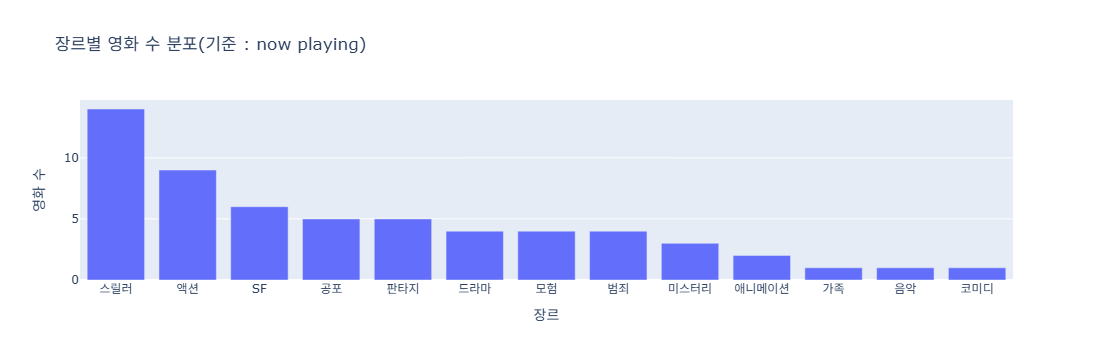

In [18]:
# 장르별 시각화 

import plotly.express as px

fig = px.bar(
    agg.sort_values("movie_count", ascending=False),  # ascending :오름차순
    x="genre",
    y="movie_count",
    title="장르별 영화 수 분포(기준 : now playing)"
)

fig.update_layout(xaxis_title="장르", yaxis_title="영화 수")
fig.show()

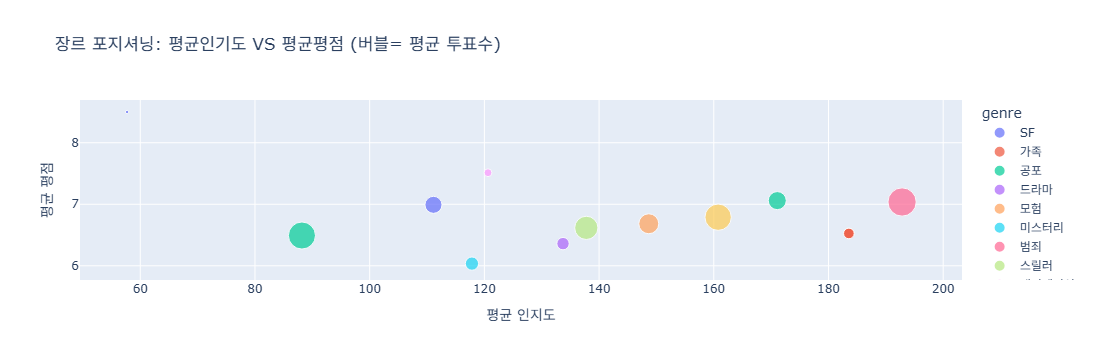

In [24]:
# 산점도 그래프
import plotly.express as px

fig = px.scatter(
    agg,
    x="avg_popularity", 
    y="avg_vote_average",
    hover_name="genre",
    color="genre",
    size="avg_vote_count",
    title="장르 포지셔닝: 평균인기도 VS 평균평점 (버블= 평균 투표수)"
    
)

fig.update_layout(xaxis_title="평균 인지도", yaxis_title="평균 평점" )
fig.show()

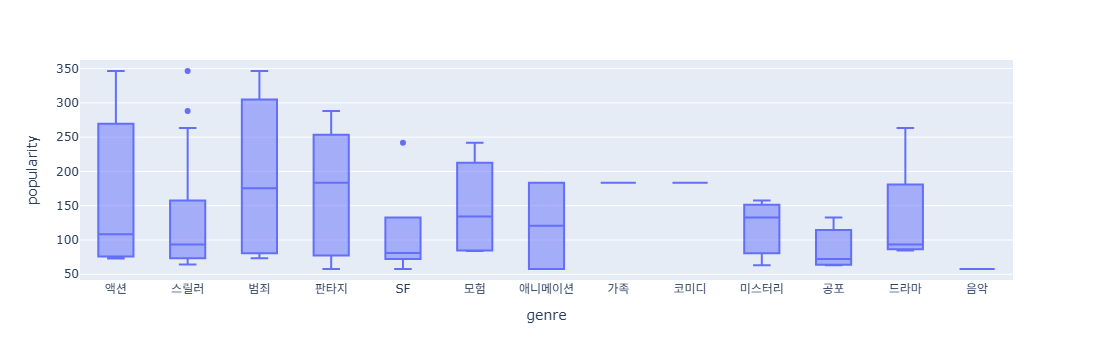

In [26]:
# box plot 박스 플롯 

import plotly.express as px

fig = px.box(
    df_g,
    x="genre",
    y="popularity"
)

fig.show()

(12, 15, 18, 20, 22, 25, 30, 35, 40, 100)
- 100 때문에 평균값이 올라감 -> 평균이 값을 잘 반영하지 못함
- 중앙값/중간값
  > 물리적인 가운데값
  > 짝수 :중간에 위치한 값을 (5번째, 6번째) 더한 평균
  > 홀수 : 11 -> 그 가운데 1개 값
  > median = (22+25)/2= 23.5

- Q1, Q3
  > 하위 50% = 12, 15, 18, 20, 22
   > Q1 = 하위 50%의 중앙값 = 1사분위 = Q1 = 25%  = 18 (하위 25%))
  > 상위 50% = 25, 30, 35, 40, 100]
   > Q3 = 상위 50%의 중앙값 = 3사분위 = Q3 = 75%  = 35 (상위 25%)

- IQR = Interquartile Range = 중앙값 기준 퍼짐정도
  > IQR = Q3 -Q1 = 35-18=17

- Lower Faence = 상한치
  > Q1 -IQR x 1.5 = 18-(17*1.5) = 18-25.5= -7.5 
- Upper Faence = 하한치
  > Q3 + IQR x 1.5 = 35 +(17*1.5)) = 35+25.5 = 60.5

- min = 12
- max = 40
- Ontlier = 이상치 = 100
- 
- mean = 평균
  > (12+ 15+ 18+ 20+ 22+ 25+ 30+ 35+ 40+ 100)/10 = 31.7

- 표준편차 = 모든 편차의 평균 
  > 편차 : 평균에서의 차이  ex) 12-31.7= -19.7 / -16.7 / -16.7 ~ 68.3
  > 평균으로부터 대체적으로 얼만큼 떨어져 있는냐가 중요

- 제곱편차 
  > 음수가 생기기 때문에 제곱을 하여 양수로 만들어주는것
  > 388.09+ 278.89+ 187.69 ~ 4664.89 => 5878.10
  > 제곱편차/10 = 모(집단)분산 = 587.81 => 10개라는 데이터가 확실하게 고정
  > 제곱편차/n-1 = 표(본)분산 = 653.15 => 1000만개 -> 과소추정법칙
  > 제곱한 값 다시 원산복귀 => 루트 씌우기
  > r587.81 = 24.24  / r653.12 = 25.55


In [11]:
TAGET_GENRE = "스릴러"
TOP_N = 10 

tmp = df_g[df_g["genre"] == TAGET_GENRE].copy()
tmp = tmp.dropna(subset={"popularity"})
tmp = tmp.sort_values("popularity", ascending=False).head(TOP_N)

fig = px.bar(
    tmp.sort_values("popularity"),
    x = "popularity",
    y = "title",
    hover_date= ["vote_average", "vote_count", "original_language"],
    title=f"{TAGET_GENRE} 장르 popularity Top{Top_N}" 
)

fig.update_layout(xaxis_title="popularity", yaxis_title="영화제목")
fig.show()

NameError: name 'px' is not defined